In [2]:
import numpy as np
matr1 = np.random.random((10, 3))
itog = matr1[np.arange(10), np.abs(matr1 - .5).argmin(axis=1)]
print(matr1)
print(itog)

[[0.09823476 0.09771877 0.64142684]
 [0.8897532  0.95964368 0.16722537]
 [0.16286574 0.00969073 0.03779573]
 [0.83465119 0.45346859 0.71355264]
 [0.75286993 0.55494167 0.25061385]
 [0.64986515 0.2721389  0.79281493]
 [0.5030027  0.16085242 0.68125346]
 [0.04874072 0.13034942 0.93413548]
 [0.41450414 0.55593298 0.28456178]
 [0.9254689  0.31656486 0.77445223]]
[0.64142684 0.16722537 0.16286574 0.45346859 0.55494167 0.64986515
 0.5030027  0.13034942 0.55593298 0.31656486]


In [3]:
matr = np.random.random((6, 6))
summa = matr.sum(axis=1)
minimal = matr.min(axis=0)
itog = summa / minimal
print(matr)
print(itog)

[[0.58395622 0.59576339 0.02061378 0.1515303  0.60837199 0.41779914]
 [0.15641218 0.63724584 0.22474994 0.3049747  0.51944334 0.17528793]
 [0.2170962  0.27765758 0.83318243 0.44318497 0.14448439 0.0437498 ]
 [0.44878661 0.63048472 0.01696689 0.70342767 0.91611951 0.67292024]
 [0.96632442 0.17721335 0.56997179 0.77162421 0.98052635 0.11061928]
 [0.94757625 0.93577679 0.96273622 0.03986981 0.48781846 0.54651398]]
[ 15.20364237  11.38804682 115.48109271  84.99428198  24.75201173
  89.60706416]


In [4]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
after0 = x[np.where(x[:-1] == 0)[0] + 1].max()
print(after0)

5


In [5]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(x)
np.add.at(x, i, 1)
print(x)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [6]:
a = np.arange(16).reshape(4, 4)
size = a.shape[0]
print("N =", size)
dictionary = {i: [a[j, i - j] for j in range(i + 1) if j < size and i - j < size] 
        for i in range(size * 2 - 1)}
print(a)
print(dictionary)

N = 4
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


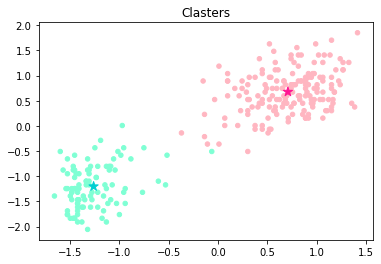

In [9]:
import numpy as np
import scipy.cluster
import matplotlib.pyplot as plt
    
    
data = np.loadtxt('data.txt', skiprows=1)[:, 1:]
data = (data - data.mean(axis=0)) / data.std(axis=0)

def get_labels(pts, centroids):
    
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

def normtotal(obs, centroids, labels):
    temp = 0
    for i in range(centroids.shape[0]):
        temp += abs(np.linalg.norm(obs[i==labels] - centroids[i], axis = 1).sum())
    return temp
def kmeans(obs, k_or_guess, iter = 20, thresh = 1e-05):
    centroids = np.random.random((k_or_guess, obs.shape[1]))
    labels = get_labels(obs, centroids)
    norminitial = normtotal(obs, centroids, labels)
    minnorm = norminitial
    newcetroids = centroids
    
    for i in range(iter):
        normstop = norminitial
        centroids = np.array([obs[labels == i].mean(axis = 0) for i in range (k_or_guess)])
        labels = get_labels(obs, centroids)
        norminitial = normtotal(obs, centroids, labels)
        if norminitial < minnorm:
            newcetroids = centroids
            minnorm = norminitial
        if abs(norminitial - normstop) < thresh: 
            break
            
    return newcetroids
centroids = kmeans(data, 2)
labels = get_labels(data, centroids)
plt.scatter(*data.T, c=np.where(labels, "aquamarine","lightpink"), s=20)
plt.scatter(*centroids.T, c=["deeppink", "darkturquoise"], s=95, marker='*')
plt.title('Clasters')
plt.show()